# Heating series

Works on ppmstar.org with JL3

In [1]:
%pylab ipympl
from astropy import units
from nugridpy import utils as ut
from scipy import interpolate
import sys
import pickle  
import os

from tqdm import tqdm

sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
#sys.path.insert(0,'/user/scratch14_ppmstar-lcse/fherwig/PyPPM')
#sys.path.insert(0,'/user/niagara.scratch.ppmstar/H-core-M3/PyPPM')
# /scratch/f/fherwig/fherwig/repos/PyPPM
from ppmpy import ppm  
logging.getLogger("matplotlib").setLevel(logging.ERROR)

Populating the interactive namespace from numpy and matplotlib


In [29]:
# Data dictionary to hold the data for the different cases analysed in this nb
data = {}  
nominal_heat = 0.1485 # Nominal luminosity in code units
eos = 'r' # EOS used for the run
dir = '/home/user/user/'
runs = ['V2','V3','V4','V5','V7',
        'V8','V9','V10','V11','V12']
ddir = ['niagara_scratch_fherwig/V2-1000xL-1000xK-768-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V3-1000xL-1000xK-1152-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V4-100xL-100xK-1152-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V5-10xL-10xK-1152-TyroneM1e4_0.1',
        'frontera_scratch3_mao1/V7-100xL-100xK-1728-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V8-100xL-100xK-768-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V9-1e4xL-1e4xK-768-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V10-3162xL-3162xK-768-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V11-316xL-316xK-768-TyroneM1e4_0.1',
        'niagara_scratch_fherwig/V12-10xL-10xK-768-TyroneM1e4_0.1']
heating = [1000,1000,100,10,100,
           100,1e4,3162,316.2,10]
grid    = [768,1152,1152,1152,1728,
           768,768,768,768,768]

rprof = {}
for i,run in enumerate(runs):
    rprof_dir = os.path.join('/home/user/user',ddir[i],'prfs')
    rprof[run] = ppm.RprofSet(rprof_dir)    

1579 rprof files found in '/home/user/user/niagara_scratch_fherwig/V2-1000xL-1000xK-768-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 1578.
927 rprof files found in '/home/user/user/niagara_scratch_fherwig/V3-1000xL-1000xK-1152-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 926.
862 rprof files found in '/home/user/user/niagara_scratch_fherwig/V4-100xL-100xK-1152-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 861.
1205 rprof files found in '/home/user/user/niagara_scratch_fherwig/V5-10xL-10xK-1152-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 1204.
1160 rprof files found in '/home/user/user/frontera_scratch3_mao1/V7-100xL-100xK-1728-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 1159.
2541 rprof files found in '/home/user/user/niagara_scratch_fherwig/V8-100xL-100xK-768-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 2540.
1376 rprof files found in '/home/user/user/niagara_scratch_fherwig/V9-1e4xL-1e4xK-768-TyroneM1e4_0.1/prfs/.
Dump numbers range from 0 to 1395

## Convective core Urms total

Here we measure the convective U by calculating the kinetic energy in the convective core.

In [30]:
t = 800 # average over the last t hours of each run
rmin = 0; rmax = 8000 # range for averaging rprof

In [31]:
#%%capture
for i,run in enumerate(runs):
    # build list of dumps over which to average - method #1: last t hours of each sim
    tend = rprof[run].get_history().get('time(mins)')[-1]
    deltat = rprof[run].get_history().get('time(mins)')[-1] - rprof[run].get_history().get('time(mins)')[-2]
    dend = rprof[run].get_history().get('NDump')[-1]
    delta_dump = (t*60)/deltat
    dumps = arange(int(dend-delta_dump), dend, 10)
    dumps[dumps==863] = 864 # patch missing dump V9
    # build list of dumps over which to average - method #1: same hours for each sim
    # dstart = 1200*60/deltat
    # dend = 2000*60/deltat
    # dumps = arange(int(dstart), int(dend), 10)
    
    print(run,dumps)
    
    # compute the average via kinetic energy in core
    avg = rprof[run].average_profiles(fname=dumps,var=['|U|','Rho0'])
    mask = (avg['R']>rmin)&(avg['R']<rmax)
    rho = avg['Rho0'][mask]
    U = avg['|U|'][mask]
    r = avg['R'][mask]
    ekin = -trapz(0.5*rho*U*U*r*r, x=r)
    mass = -trapz(rho*r*r, x=r)
    data['allmeanU'+'_'+run] = sqrt(2*ekin/mass)

V2 [1026 1036 1046 1056 1066 1076 1086 1096 1106 1116 1126 1136 1146 1156
 1166 1176 1186 1196 1206 1216 1226 1236 1246 1256 1266 1276 1286 1296
 1306 1316 1326 1336 1346 1356 1366 1376 1386 1396 1406 1416 1426 1436
 1446 1456 1466 1476 1486 1496 1506 1516 1526 1536 1546 1556 1566 1576]
V3 [559 569 579 589 599 609 619 629 639 649 659 669 679 689 699 709 719 729
 739 749 759 769 779 789 799 809 819 829 839 849 859 869 879 889 899 909
 919]
V4 [677 687 697 707 717 727 737 747 757 767 777 787 797 807 817 827 837 847
 857]
V5 [1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150
 1160 1170 1180 1190 1200]
V7 [ 792  802  812  822  832  842  852  862  872  882  892  902  912  922
  932  942  952  962  972  982  992 1002 1012 1022 1032 1042 1052 1062
 1072 1082 1092 1102 1112 1122 1132 1142 1152]
V8 [1994 2004 2014 2024 2034 2044 2054 2064 2074 2084 2094 2104 2114 2124
 2134 2144 2154 2164 2174 2184 2194 2204 2214 2224 2234 2244 2254 2264
 2274 2284 2294 2304 2314 2324 2334 2

In [5]:
matplotlib.rcParams.update({'font.size': 12})
import matplotlib.ticker as mticker

In [6]:
def ticks_format(value, index):
    if value in [20,30,40,60,80,100]:
        return str(int(value))
    else:
        return ''

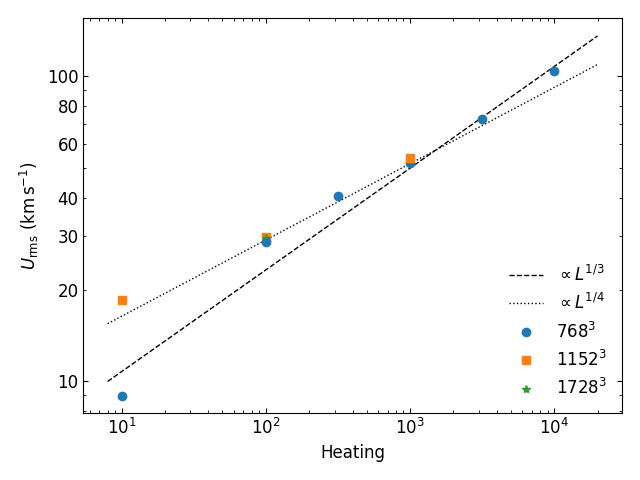

In [7]:
close(1);figure(1)

hv = linspace(8,2e4,10)
scale = 5.
loglog(hv, scale*hv**(1/3), '--k', lw=1, label=r'$\propto L^{1/3}$')
scale = 9.2
loglog(hv, scale*hv**(1/4), ':k', lw=1, label=r'$\propto L^{1/4}$')

first1152=True;first768=True
for i,run in enumerate(runs):
    if grid[i]==1728:
        symbol = '*'
        color = 'tab:green'
        label=r'$1728^3$'
    elif grid[i]==1152:
        symbol = 's'
        color = 'tab:orange'
        if first1152:
            label=r'$1152^3$'
            first1152=False
        else:
            label=None
    elif grid[i]==768:
        symbol = 'o'
        color = 'tab:blue'
        if first768:
            label=r'$768^3$'
            first768=False
        else:
            label=None
    loglog([heating[i]], [1000*data['allmeanU'+'_'+run]],color=color,
           marker=symbol,label=label,ls='none')
xlabel('Heating')
ylabel(r'$U_{\rm rms}$ (km$\,$s$^{-1}$)')
legend(frameon=False, loc=4)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mticker.FuncFormatter(ticks_format))
tight_layout()

## Urms at fix radius

Here we compute the convective velocity at a fix multiple of $H_p$ below the convective boundary.

In [8]:
Hpbelow = 1

In [10]:
for i,run in enumerate(tqdm(runs)):
    # build list of dumps over which to average - method #1: last t hours of each sim
    tend = rprof[run].get_history().get('time(mins)')[-1]
    deltat = rprof[run].get_history().get('time(mins)')[-1] - rprof[run].get_history().get('time(mins)')[-2]
    dend = rprof[run].get_history().get('NDump')[-1]
    delta_dump = (t*60)/deltat
    dumps = arange(int(dend-delta_dump), dend, 10)
    dumps[dumps==863] = 864 # patch missing dump V9
    
    Urms = 0
    for dump in dumps:
        Hpv = rprof[run].compute_Hp(dump)
        Rv = rprof[run].get('R',dump)
        cb = rprof[run].bound_rad(dump,r_min=6000,r_max=10000,var='ut',criterion='min_grad')
        Rtar = cb - interp(cb,Rv[::-1],Hpv[::-1])
        Urmsv = rprof[run].get('|U|',dump)
        Urms += interp(Rtar, Rv[::-1], Urmsv[::-1])/len(dumps)
        
    data['fixmeanU'+'_'+run] = Urms

100%|██████████| 10/10 [00:00<00:00, 10.40it/s]


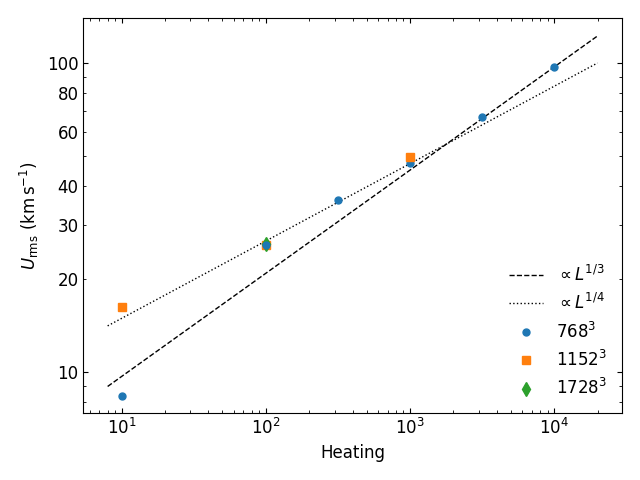

In [28]:
close(2);figure(2)

hv = linspace(8,2e4,10)
scale = 4.5
loglog(hv, scale*hv**(1/3), '--k', lw=1, label=r'$\propto L^{1/3}$')
scale = 8.4
loglog(hv, scale*hv**(1/4), ':k', lw=1, label=r'$\propto L^{1/4}$')

first1152=True;first768=True
for i,run in enumerate(runs):
    ms=6
    if grid[i]==1728:
        symbol = 'd'
        color = 'tab:green'
        label=r'$1728^3$'
        ms=7
    elif grid[i]==1152:
        symbol = 's'
        color = 'tab:orange'
        if first1152:
            label=r'$1152^3$'
            first1152=False
        else:
            label=None
    elif grid[i]==768:
        symbol = 'o'
        ms=5
        color = 'tab:blue'
        if first768:
            label=r'$768^3$'
            first768=False
        else:
            label=None
    loglog([heating[i]], [1000*data['fixmeanU'+'_'+run]],color=color,
           marker=symbol,label=label,ls='none',ms=ms)
xlabel('Heating')
ylabel(r'$U_{\rm rms}$ (km$\,$s$^{-1}$)')
legend(frameon=False, loc=4)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mticker.FuncFormatter(ticks_format))
tight_layout()
savefig('heating_series.pdf', bbox_inches='tight')